In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib

In [2]:
# Charger les données
df = pd.read_csv("credit_risk_dataset.csv")

# Afficher les premières lignes
display(df.head())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Supprimer ou imputer les valeurs manquantes
df = df.dropna()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [10]:
# Transformer les variables catégorielles
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
# Séparer les variables indépendantes (X) et la cible (y)
X = df.drop(columns=['loan_status'])  # La colonne cible est 'loan_status'
y = df['loan_status']

In [12]:
# Diviser en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Entraînement des modèles
log_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

log_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [15]:
# Prédictions
y_pred_log = log_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Évaluation des modèles
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"\nÉvaluation du modèle : {model_name}")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)
    print("\nMatrice de confusion:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(report)
    return accuracy, recall, f1, auc_roc, conf_matrix

In [34]:
# Évaluer les modèles et stocker la matrice de confusion
acc_log, rec_log, f1_log, auc_log, conf_matrix_log = evaluate_model(y_test, y_pred_log, "Régression Logistique")
acc_dt, rec_dt, f1_dt, auc_dt, conf_matrix_dt = evaluate_model(y_test, y_pred_dt, "Arbre de Décision")


Évaluation du modèle : Régression Logistique
Accuracy: 0.8392108938547486
Recall: 0.44980544747081713
F1 Score: 0.5565719788155994
AUC-ROC: 0.7008198968166599

Matrice de confusion:
[[4229  214]
 [ 707  578]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4443
           1       0.73      0.45      0.56      1285

    accuracy                           0.84      5728
   macro avg       0.79      0.70      0.73      5728
weighted avg       0.83      0.84      0.82      5728


Évaluation du modèle : Arbre de Décision
Accuracy: 0.8873952513966481
Recall: 0.7704280155642024
F1 Score: 0.7542857142857143
AUC-ROC: 0.8458262067467647

Matrice de confusion:
[[4093  350]
 [ 295  990]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4443
           1       0.74      0.77      0.75      1285

    accuracy                           0.89   

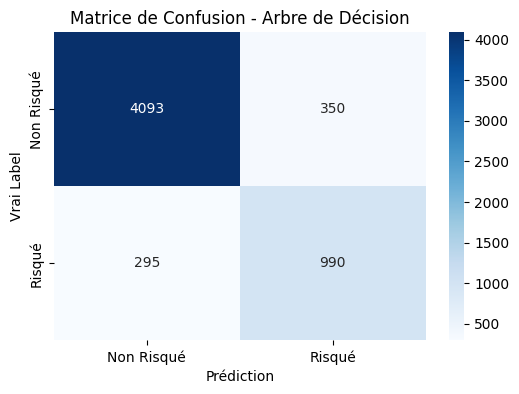

In [35]:
# Visualiser la matrice de confusion du meilleur modèle
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Risqué', 'Risqué'], yticklabels=['Non Risqué', 'Risqué'])
plt.xlabel('Prédiction')
plt.ylabel('Vrai Label')
plt.title('Matrice de Confusion - Arbre de Décision')
plt.show()

In [37]:
# Comparaison des modèles
models_comparison = pd.DataFrame({
    'Modèle': ['Régression Logistique', 'Arbre de Décision'],
    'Accuracy': [acc_log, acc_dt],
    'Recall': [rec_log, rec_dt],
    'F1 Score': [f1_log, f1_dt],
    'AUC-ROC': [auc_log, auc_dt]
})
print("\nComparaison des performances des modèles :")
display(models_comparison)


Comparaison des performances des modèles :


,Modèle,Accuracy,Recall,F1 Score,AUC-ROC
0,Régression Logistique,0.839211,0.449805,0.556572,0.700820
1,Arbre de Décision,0.887395,0.770428,0.754286,0.845826


Interprétation des résultats :
- La régression logistique a une bonne précision globale, mais un rappel faible, ce qui signifie qu'elle ne détecte pas bien les clients à risque.
- L'arbre de décision a un meilleur rappel (77%), ce qui le rend plus efficace pour identifier les clients risqués.

In [41]:
# Sauvegarde du meilleur modèle
joblib.dump(dt_model, "model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

Remarque :
Le fichier scaler.joblib contient l'objet StandardScaler utilisé pour normaliser les données d'entraînement. Sauvegarder ce scaler permet de garantir que les nouvelles données seront transformées de la même manière avant d'être utilisées pour la prédiction.
Lors de l'utilisation du modèle sur de nouvelles données, il est important de recharger le scaler et de normaliser les données avant de les passer au modèle, sinon les prédictions risquent d’être faussées.

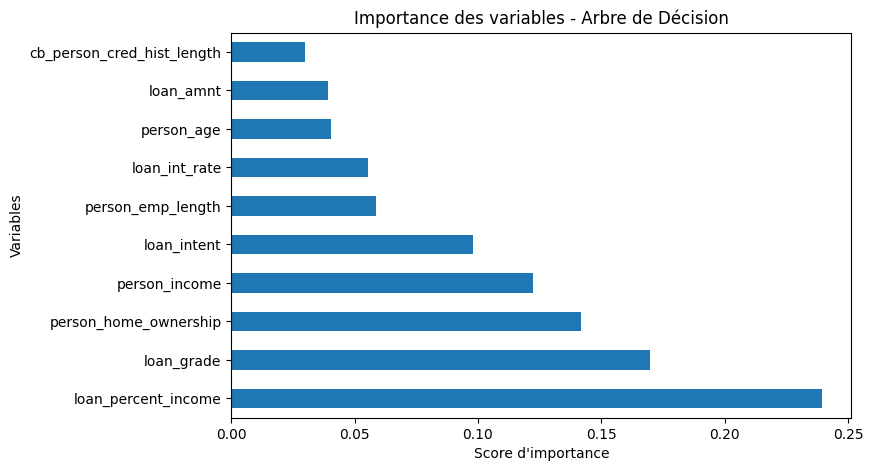

In [38]:
# Visualisation des importances des features pour l'arbre de décision
plt.figure(figsize=(8,5))
feat_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Importance des variables - Arbre de Décision")
plt.xlabel("Score d'importance")
plt.ylabel("Variables")
plt.show()